In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision



In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [3]:
batch_size = 64
test_batch_size = 1000
epochs = 10

In [4]:
# load MNIST data
transformer = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor(),
     torchvision.transforms.Normalize((0.1306,), (0.3081,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                      download=True, transform=transformer)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transformer)
testloader = torch.utils.data.DataLoader(testset, batch_size=test_batch_size,
                                         shuffle=False, num_workers=2)

In [5]:
print(trainset.data.float().mean()/255)
print(trainset.data.float().std()/255)

tensor(0.1306)
tensor(0.3081)


In [6]:
classes = np.arange(10)

In [7]:
# functions to show an image
def imshow(img):
#     img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


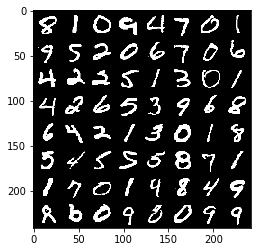

 8  1  0  9  4  7  0  1  9  5  2  0  6  7  0  6  4  2  2  5  1  3  0  1  4  2  6  5  3  9  6  8  6  4  2  1  3  0  1  8  5  4  5  5  5  8  7  1  1  7  0  1  4  8  4  9  8  6  0  9  8  0  9  9


In [8]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%2s' % classes[labels[j]] for j in range(batch_size)))

In [9]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

net = Net()
net.to(device)

Net(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

In [10]:
# set loss and optimizer
criterion = F.nll_loss
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [11]:
for epoch in range(epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
#         inputs, labels = data
        
        inputs, labels = data[0].to(device), data[1].to(device)


        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 100 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print('Finished Training')


[1,   100] loss: 2.049
[1,   200] loss: 0.804
[1,   300] loss: 0.426
[1,   400] loss: 0.338
[1,   500] loss: 0.303
[1,   600] loss: 0.262
[1,   700] loss: 0.221
[1,   800] loss: 0.197
[1,   900] loss: 0.195
[2,   100] loss: 0.173
[2,   200] loss: 0.159
[2,   300] loss: 0.158
[2,   400] loss: 0.142
[2,   500] loss: 0.122
[2,   600] loss: 0.127
[2,   700] loss: 0.122
[2,   800] loss: 0.120
[2,   900] loss: 0.110
[3,   100] loss: 0.101
[3,   200] loss: 0.093
[3,   300] loss: 0.097
[3,   400] loss: 0.102
[3,   500] loss: 0.096
[3,   600] loss: 0.092
[3,   700] loss: 0.090
[3,   800] loss: 0.085
[3,   900] loss: 0.088
[4,   100] loss: 0.081
[4,   200] loss: 0.075
[4,   300] loss: 0.079
[4,   400] loss: 0.081
[4,   500] loss: 0.071
[4,   600] loss: 0.071
[4,   700] loss: 0.068
[4,   800] loss: 0.073
[4,   900] loss: 0.068
[5,   100] loss: 0.063
[5,   200] loss: 0.062
[5,   300] loss: 0.069
[5,   400] loss: 0.060
[5,   500] loss: 0.056
[5,   600] loss: 0.061
[5,   700] loss: 0.059
[5,   800] 

In [13]:
correct_train = 0
total_train = 0
# no gradient computation
with torch.no_grad():
    for data in trainloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

print('Accuracy of the network on the %d train images: %.1f %%' % (total_train, 
    100. * correct_train / total_train))

Accuracy of the network on the 60000 train images: 99.2 %


In [14]:
correct = 0
total = 0
# no gradient computation
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the %d test images: %.1f %%' % (total, 
    100 * correct / total))

Accuracy of the network on the 10000 test images: 98.8 %


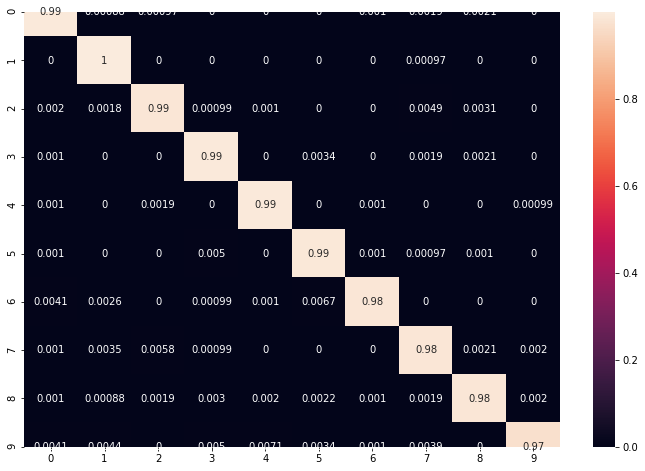

In [15]:
# get confusion matrix
predicted_class_count = np.zeros((10, 10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        for i in range(test_batch_size):
            label = labels[i]
            predicted_class_count[label][predicted[i]] += 1
            class_total[label] += 1
            
confusion_mat = predicted_class_count/class_total
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_mat,annot=confusion_mat, xticklabels=classes, yticklabels=classes)
plt.show()

In [16]:
# save model
SAVE_PATH = 'mycheckpoints/MNIST_2C2F.pt'
torch.save(net.state_dict(), SAVE_PATH)
